In [50]:
# import all the required libraries
import pandas as pd
import numpy as np
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings("ignore")

In [42]:
elec_frame=pd.read_csv('result_2017.csv')

In [43]:
print(elec_frame.shape)
elec_frame.head()

(4826, 30)


,Unnamed: 0,DIST_NAME,AC_NAME,AC_TYPE,CAND_NAME,CAND_SEX,CAND_CATEGORY,CAND_AGE,PARTYABBRE,TOTALVALIDVOTESPOLLED,POSITION,incumb_match_key,incumb_bool,AC_NAME_clean,Party Type,Party Name,Party Abbreviation,match_key_x,mapped_match_key,Sno,Candidate∇,Constituency,Party,CriminalCase,Education,TotalAssets,Liabilities,Constituency_cleaned,Party_clean,match_key_y
0,0,saharanpur,behat,GEN,nareshsaini,M,GEN,53.0,INC,97035,1,behatnareshsainiINC1,False,behat,N,indiannationalcongress,INC,indiannationalcongressbehatnareshsaini,indiannationalcongressbehatnareshsaini,2390.0,nareshsaini,behat,inc,0.0,PostGraduate,"Rs 1,07,80,291","Rs 3,98,000",behat,indiannationalcongress,indiannationalcongressbehatnareshsaini
1,1,saharanpur,behat,GEN,mahaveersinghrana,M,GEN,55.0,BJP,71449,0,behatmahaveersinghranaBJP0,False,behat,N,bharatiyajanataparty,BJP,bharatiyajanatapartybehatmahaveersinghrana,bharatiyajanatapartybehatmahaveersinghrana,1924.0,mahaveersinghrana,behat,bjp,0.0,GraduateProfessional,"Rs 5,56,63,295","Rs 29,85,082",behat,bharatiyajanataparty,bharatiyajanatapartybehatmahaveersinghrana
2,2,saharanpur,behat,GEN,mohd.iqbal,M,GEN,52.0,BSP,71019,0,behatmohd.iqbalBSP0,False,behat,N,bahujansamajparty,BSP,bahujansamajpartybehatmohd.iqbal,bahujansamajpartybehatmohd.iqbal,2232.0,mohd.iqbal,behat,bsp,0.0,Literate,"Rs 14,01,03,795","Rs 1,02,14,938",behat,bahujansamajparty,bahujansamajpartybehatmohd.iqbal
3,3,saharanpur,behat,GEN,ranaadityapratapsingh,M,GEN,49.0,IND,4187,0,behatranaadityapratapsinghIND0,False,behat,Z,independent,IND,independentbehatranaadityapratapsingh,independentbehatranaadityapratapsingh,3415.0,ranaadityapratapsingh,behat,ind,0.0,12thPass,"Rs 6,59,20,214","Rs 2,86,731",behat,independent,independentbehatranaadityapratapsingh
4,4,saharanpur,behat,GEN,kamranali,M,GEN,37.0,BhaSP,1255,0,behatkamranaliBhaSP0,False,behat,U,bhartisamudayaparty,BhaSP,bhartisamudayapartybehatkamranali,bhartisamudayapartybehatkamranali,1647.0,kamranali,behat,bhartisamudayaparty,0.0,10thPass,"Rs 6,82,859",Rs 0,behat,bhartisamudayaparty,bhartisamudayapartybehatkamranali


In [44]:
elec_frame.columns

Index(['Unnamed: 0', 'DIST_NAME', 'AC_NAME', 'AC_TYPE', 'CAND_NAME',
       'CAND_SEX', 'CAND_CATEGORY', 'CAND_AGE', 'PARTYABBRE',
       'TOTALVALIDVOTESPOLLED', 'POSITION', 'incumb_match_key', 'incumb_bool',
       'AC_NAME_clean', 'Party Type', 'Party Name', 'Party Abbreviation',
       'match_key_x', 'mapped_match_key', 'Sno', 'Candidate∇', 'Constituency',
       'Party', 'CriminalCase', 'Education', 'TotalAssets', 'Liabilities',
       'Constituency_cleaned', 'Party_clean', 'match_key_y'],
      dtype='object')

In [45]:
elec_frame.drop(columns=['Unnamed: 0','AC_NAME','PARTYABBRE','incumb_match_key','AC_NAME_clean','Party Type',
                        'match_key_x','Sno','Candidate∇','Party Name','mapped_match_key','Party',
                        'Constituency','match_key_y'],axis=1,inplace=True)

In [46]:
elec_frame.columns

Index(['DIST_NAME', 'AC_TYPE', 'CAND_NAME', 'CAND_SEX', 'CAND_CATEGORY',
       'CAND_AGE', 'TOTALVALIDVOTESPOLLED', 'POSITION', 'incumb_bool',
       'Party Abbreviation', 'CriminalCase', 'Education', 'TotalAssets',
       'Liabilities', 'Constituency_cleaned', 'Party_clean'],
      dtype='object')

In [47]:
elec_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 16 columns):
DIST_NAME                4826 non-null object
AC_TYPE                  4826 non-null object
CAND_NAME                4826 non-null object
CAND_SEX                 4826 non-null object
CAND_CATEGORY            4826 non-null object
CAND_AGE                 4826 non-null float64
TOTALVALIDVOTESPOLLED    4826 non-null int64
POSITION                 4826 non-null int64
incumb_bool              4826 non-null bool
Party Abbreviation       4826 non-null object
CriminalCase             4826 non-null float64
Education                4826 non-null object
TotalAssets              4826 non-null object
Liabilities              4826 non-null object
Constituency_cleaned     4826 non-null object
Party_clean              4826 non-null object
dtypes: bool(1), float64(2), int64(2), object(11)
memory usage: 570.3+ KB


In [48]:
elec_frame['TotalAssets']=elec_frame.TotalAssets.str.replace('Rs','').str.strip().str.replace(',','').str.replace('Nil','0').str.replace('nil','0').astype(float)
elec_frame['Liabilities']=elec_frame.Liabilities.str.replace('Rs','').str.strip().str.replace(',','').str.replace('Nil','0').str.replace('nil','0').astype(float)

In [49]:
elec_frame.head()

,DIST_NAME,AC_TYPE,CAND_NAME,CAND_SEX,CAND_CATEGORY,CAND_AGE,TOTALVALIDVOTESPOLLED,POSITION,incumb_bool,Party Abbreviation,CriminalCase,Education,TotalAssets,Liabilities,Constituency_cleaned,Party_clean
0,saharanpur,GEN,nareshsaini,M,GEN,53.0,97035,1,False,INC,0.0,PostGraduate,10780291.0,398000.0,behat,indiannationalcongress
1,saharanpur,GEN,mahaveersinghrana,M,GEN,55.0,71449,0,False,BJP,0.0,GraduateProfessional,55663295.0,2985082.0,behat,bharatiyajanataparty
2,saharanpur,GEN,mohd.iqbal,M,GEN,52.0,71019,0,False,BSP,0.0,Literate,140103795.0,10214938.0,behat,bahujansamajparty
3,saharanpur,GEN,ranaadityapratapsingh,M,GEN,49.0,4187,0,False,IND,0.0,12thPass,65920214.0,286731.0,behat,independent
4,saharanpur,GEN,kamranali,M,GEN,37.0,1255,0,False,BhaSP,0.0,10thPass,682859.0,0.0,behat,bhartisamudayaparty


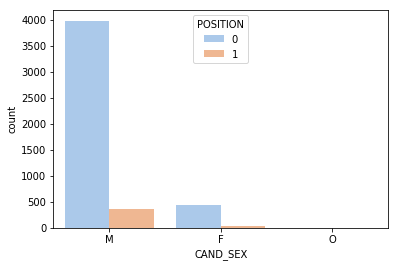

In [61]:
sns.countplot(x='CAND_SEX',
                palette='pastel',
                hue='POSITION',
                data=elec_frame)
plt.show()

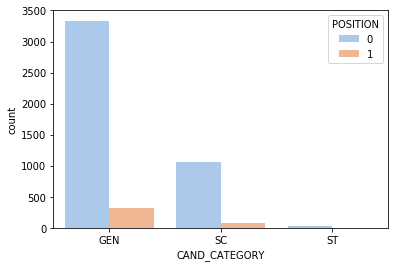

In [62]:
sns.countplot(x='CAND_CATEGORY',
                palette='pastel',
                hue='POSITION',
                data=elec_frame)
plt.show()

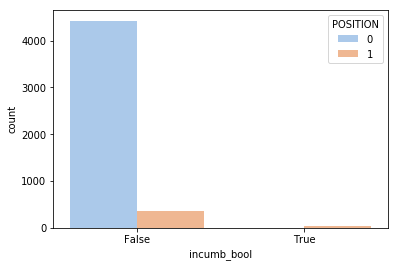

In [63]:
sns.countplot(x='incumb_bool',
                palette='pastel',
                hue='POSITION',
                data=elec_frame)
plt.show()